In [ ]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import Ag
from meep.materials import GaN
from meep.materials import SiO2
from meep.materials import Al2O3

In [ ]:
# 시뮬레이션 단위 설정
resolution = 20
nm = 1e-3
size = mp.Vector3(1000*nm,1000*nm,0)


# 재료 정의(Ag의 경우는 음의 굴절률을 가지기 때문에 conductivity로 변환)
GaN = mp.Medium(epsilon=8.9)  # GaN
qw = mp.Medium(epsilon=8.9)  # QW (양자 우물, GaN과 비슷하게 설정)
sio2 = mp.Medium(epsilon=2.1)  # SiO2
al2o3 = mp.Medium(epsilon=3.1)  # Al2O3

# 구조 정의
geometry = [
    mp.Block(size=mp.Vector3(1000 * nm, 1000 * nm), center=mp.Vector3(), material=gan),
    mp.Block(size=mp.Vector3(1000 * nm, 5 * nm), center=mp.Vector3(0, -480 * nm), material=qw),
    mp.Block(size=mp.Vector3(1000 * nm, 50 * nm), center=mp.Vector3(0, -500 * nm), material=ag),
    mp.Block(size=mp.Vector3(70 * nm, 1000 * nm), center=mp.Vector3(-465 * nm, 0), material=sio2),
    mp.Block(size=mp.Vector3(70 * nm, 1000 * nm), center=mp.Vector3(465 * nm, 0), material=sio2),
    mp.Block(size=mp.Vector3(70 * nm, 1000 * nm), center=mp.Vector3(-500 * nm, 0), material=al2o3),
    mp.Block(size=mp.Vector3(70 * nm, 1000 * nm), center=mp.Vector3(500 * nm, 0), material=al2o3)
]

# 시뮬레이션 객체 생성
sim = mp.Simulation(
    cell_size=size,
    boundary_layers=[mp.PML(100 * nm)],
    geometry=geometry,
    resolution=resolution
)

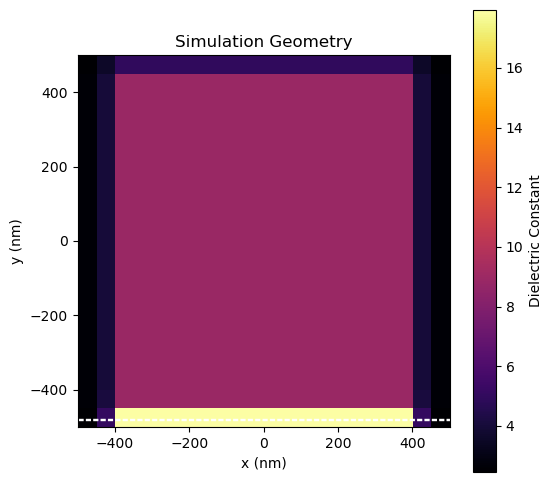

In [13]:
# 시뮬레이션 실행
sim.init_sim()

# 필드 데이터 추출 후 플로팅
def plot_simulation_geometry(sim):
    eps_data = np.array(sim.get_array(center=mp.Vector3(), size=size, component=mp.Dielectric))
    plt.figure(figsize=(6,6))
    plt.imshow(eps_data.T, origin='lower', cmap='inferno', extent=[-500, 500, -500, 500])
    plt.colorbar(label='Dielectric Constant')
    plt.xlabel("x (nm)")
    plt.ylabel("y (nm)")
    plt.title("Simulation Geometry")
    
    # QW 영역 강조 표시
    qw_y_start = (-480 * nm - 2.5 * nm) / nm
    qw_y_end = (-480 * nm + 2.5 * nm) / nm
    plt.axhline(y=qw_y_start, color='w', linestyle='--', linewidth=1)
    plt.axhline(y=qw_y_end, color='w', linestyle='--', linewidth=1)
    
    plt.show()

plot_simulation_geometry(sim)

메타 아톰 freeform 구조를 3D로 만드는 코드

In [ ]:
import meep as mp

